<a href="https://colab.research.google.com/github/dhruvchakervarti/My-finance-codes-practice/blob/master/Moving_Average_Trading_Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Dual moving average crossover to determine when to buy and sell

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as web

In [7]:
stockStartDate = '2006-10-02'
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-08-06'

In [8]:
# Get data from yahoo
AAPL = web.DataReader('AAPL',data_source='yahoo',start=stockStartDate , end=today)
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800.0,9.258014
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200.0,9.161551
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700.0,9.322326
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800.0,9.254304
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700.0,9.178867
...,...,...,...,...,...,...
2020-07-31,425.660004,403.299988,411.540009,425.040009,93584200.0,425.040009
2020-08-03,446.549988,431.570007,432.799988,435.750000,77037800.0,435.750000
2020-08-04,443.160004,433.549988,436.529999,438.660004,43267900.0,438.660004


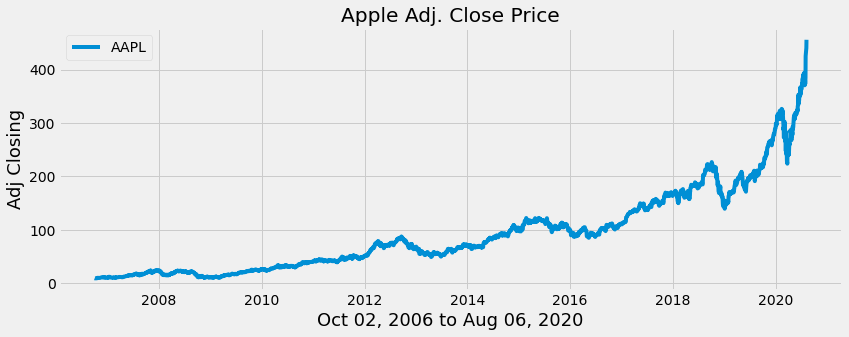

In [9]:
# Visualizing data

plt.figure(figsize = (12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price')
plt.xlabel('Oct 02, 2006 to Aug 06, 2020', fontsize=18)
plt.ylabel('Adj Closing', fontsize = 18 )
plt.legend(loc='upper left')
plt.show()

In [10]:
# Simple moving average 30 day window

SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
Date,
2006-10-02,NaN
2006-10-03,NaN
2006-10-04,NaN
2006-10-05,NaN
2006-10-06,NaN
...,...
2020-07-31,376.335332
2020-08-03,379.202999
2020-08-04,381.862666


In [11]:
# Create long term average for 100 day

SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
Date,
2006-10-02,NaN
2006-10-03,NaN
2006-10-04,NaN
2006-10-05,NaN
2006-10-06,NaN
...,...
2020-07-31,316.572586
2020-08-03,318.183222
2020-08-04,320.094223


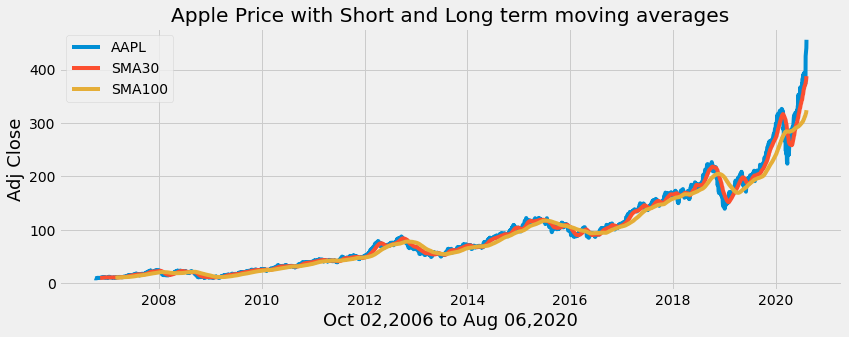

In [12]:
# Visualize
 
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Price with Short and Long term moving averages')
plt.xlabel('Oct 02,2006 to Aug 06,2020',fontsize = 18)
plt.ylabel('Adj Close', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [13]:
# We should buy if Short term crosses long term from below - buy
# We sell if short term crosses long term from above - sell

data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']

data

,AAPL,SMA30,SMA100
Date,,,
2006-10-02,9.258014,NaN,NaN
2006-10-03,9.161551,NaN,NaN
2006-10-04,9.322326,NaN,NaN
2006-10-05,9.254304,NaN,NaN
2006-10-06,9.178867,NaN,NaN
...,...,...,...
2020-07-31,425.040009,376.335332,316.572586
2020-08-03,435.750000,379.202999,318.183222
2020-08-04,438.660004,381.862666,320.094223


In [22]:
# Create a function to signal when to buy / sell 

def buy_sell(data):
  sigPricebuy = []
  sigPricesell = []
  flag = -1 # indicate when signals cross each other 

  for i in  range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPricebuy.append(data['AAPL'][i])
        sigPricesell.append(np.nan)
        flag = 1
      else:
        sigPricebuy.append(np.nan)
        sigPricesell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPricebuy.append(np.nan)
        sigPricesell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPricebuy.append(np.nan)
        sigPricesell.append(np.nan)
    else:
      sigPricebuy.append(np.nan)
      sigPricesell.append(np.nan)
  
  return (sigPricebuy, sigPricesell)


In [23]:
# Store the buy sell data into variables

buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [24]:
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2006-10-02,9.258014,NaN,NaN,NaN,NaN
2006-10-03,9.161551,NaN,NaN,NaN,NaN
2006-10-04,9.322326,NaN,NaN,NaN,NaN
2006-10-05,9.254304,NaN,NaN,NaN,NaN
2006-10-06,9.178867,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-31,425.040009,376.335332,316.572586,NaN,NaN
2020-08-03,435.750000,379.202999,318.183222,NaN,NaN
2020-08-04,438.660004,381.862666,320.094223,NaN,NaN


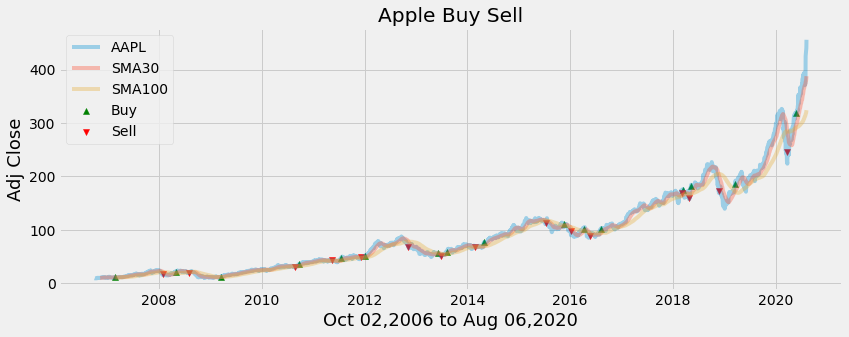

In [25]:
plt.figure(figsize=(12.5,4.5))
plt.plot(data['AAPL'], label = 'AAPL',alpha =0.35)
plt.plot(data['SMA30'],label='SMA30',alpha =0.35)
plt.plot(data['SMA100'], label ='SMA100',alpha =0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label ='Buy',marker='^',color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker='v', color ='red')
plt.title('Apple Buy Sell')
plt.xlabel('Oct 02,2006 to Aug 06,2020',fontsize = 18)
plt.ylabel('Adj Close', fontsize=18)
plt.legend(loc='upper left')
plt.show()